# 02 — EHR Data EDA

**Goal:** Explore synthetic EHR (Electronic Health Records) data.
- Check distributions of diagnosis, medications, vitals
- Detect unrealistic values
- Save figures for README/app


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ROOT = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
DATA_RAW = ROOT / "data" / "raw"
ASSETS = ROOT / "app" / "assets" / "eda"
ASSETS.mkdir(parents=True, exist_ok=True)

csv_path = DATA_RAW / "patient_ehr.csv"
df = pd.read_csv(csv_path)
df.head()

,patient_id,diagnosis,medication,blood_pressure,heart_rate,glucose_level
0,1,Coronary Artery Disease,Atorvastatin,103/84,63,153
1,2,Hypertension,Lisinopril,136/92,84,156
2,3,Asthma,Albuterol,150/63,106,77
3,4,Hypertension,Amlodipine,108/90,71,167
4,5,Coronary Artery Disease,Aspirin,123/80,106,142


In [4]:
display("Shape :", df.shape)
df.dtypes

nulls = df.isnull().sum()

display("Null Values:",nulls)

'Shape :'

(200, 6)

'Null Values:'

patient_id         0
diagnosis          0
medication        44
blood_pressure     0
heart_rate         0
glucose_level      0
dtype: int64

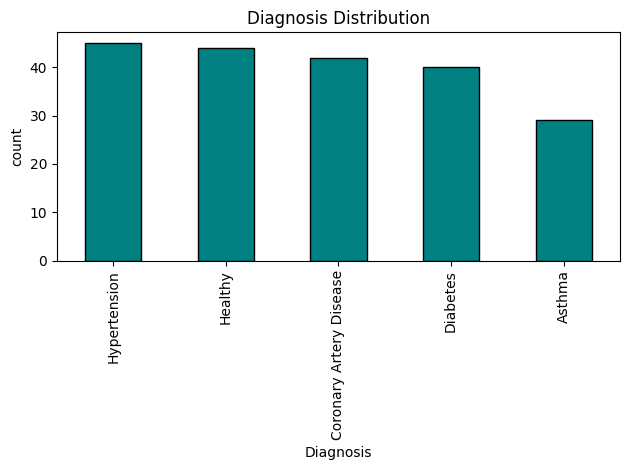

In [7]:
#diagnosis distribution
diag_counts = df['diagnosis'].value_counts()

diag_counts.plot(kind='bar',color='teal',edgecolor='black')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('count')
plt.tight_layout()
plt.savefig(ASSETS / 'diagnosis_distribution.png', dpi=150)
plt.show()